# Summer Olympics Data Analysis

**Consulting for a Sports Broadcasting Company**

**Background:**

You are working as a Data Analyst for a sports broadcasting company. The company has secured broadcasting rights for the Summer Olympics and wants to maximize audience engagement, ad revenues, and viewer retention by providing insights based on historical Olympic performance and trends.

**Business Objective:**

The company wants to leverage historical data (from 1910 to 2024) to predict viewership trends, understand which sports will generate the most interest, and create targeted marketing campaigns around specific athletes, sports, and countries. The company also aims to provide advertisers with data-backed recommendations on which events and time slots will yield the highest return on investment.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('olympics_dataset.csv')

In [5]:
df.head()

,player_id,Name,Sex,Team,NOC,Year,Season,City,Sport,Event,Medal
0,0,A Dijiang,M,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No medal
1,1,A Lamusi,M,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No medal
2,2,Gunnar Aaby,M,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,No medal
3,3,Edgar Aabye,M,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,26,Cornelia (-strannood),F,Netherlands,NED,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,No medal


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252565 entries, 0 to 252564
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   player_id  252565 non-null  int64 
 1   Name       252565 non-null  object
 2   Sex        252565 non-null  object
 3   Team       252565 non-null  object
 4   NOC        252565 non-null  object
 5   Year       252565 non-null  int64 
 6   Season     252565 non-null  object
 7   City       252565 non-null  object
 8   Sport      252565 non-null  object
 9   Event      252565 non-null  object
 10  Medal      252565 non-null  object
dtypes: int64(2), object(9)
memory usage: 21.2+ MB


In [7]:
df.isna().sum() / len(df) * 100

player_id    0.0
Name         0.0
Sex          0.0
Team         0.0
NOC          0.0
Year         0.0
Season       0.0
City         0.0
Sport        0.0
Event        0.0
Medal        0.0
dtype: float64

In [8]:
medal_df = df[df['Medal'] != 'No medal']

Analyze historical medal trends, country dominance, and athlete performance to predict which sports and events will generate the highest viewership during the 2028 Summer Olympics.

#### Participation by atheletes over the years

array([[<Axes: title={'center': 'Year'}>]], dtype=object)

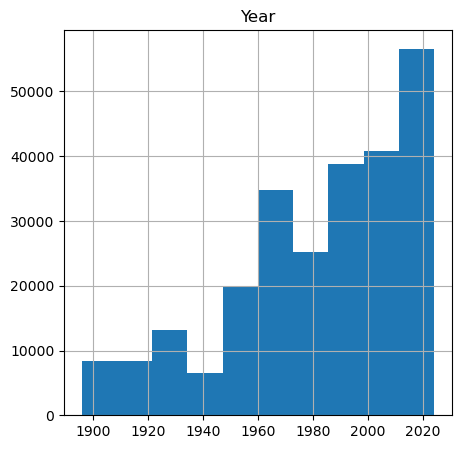

In [9]:
hist_df = df[['Year']]
hist_df.hist(figsize=(5, 5))

#### Total medals won per country

In [10]:
medal_df['Team'].value_counts()

Team
United States    5305
Soviet Union     2061
Great Britain    1895
Germany          1876
France           1736
                 ... 
Iraq                1
Cicely-1            1
Fantlet-7           1
Djibouti            1
Brynhild-2          1
Name: count, Length: 499, dtype: int64

#### Medal counts by year

<Axes: xlabel='Year', ylabel='count'>

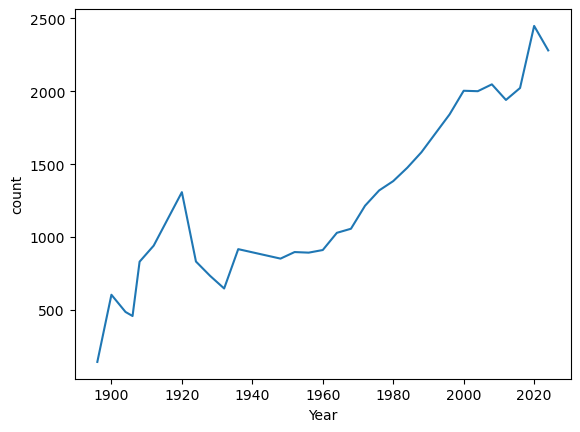

In [11]:
plot_data = medal_df['Year'].value_counts()

sns.lineplot(data=plot_data, x=plot_data.index, y=plot_data)

#### Ranking countries by total medals for each Olympic year

In [12]:
# Group by 'Team' and 'Year' to get the count of medals
medal_count = medal_df.groupby(['Team','Year']).size().reset_index(name='Total_Medals')

medal_count['Rank'] = medal_count.groupby('Year')['Total_Medals'].rank(method='dense', ascending=False)

medal_count = medal_count.sort_values(by=['Year','Rank'])

medal_count

,Team,Year,Total_Medals,Rank
724,Greece,1896,44,1.0
642,Germany,1896,31,2.0
1742,United States,1896,20,3.0
583,France,1896,11,4.0
676,Great Britain,1896,7,5.0
...,...,...,...,...
1301,Peru,2024,1,37.0
1373,Qatar,2024,1,37.0
1453,Singapore,2024,1,37.0
1465,Slovakia,2024,1,37.0


<Axes: xlabel='Total_Medals', ylabel='Team'>

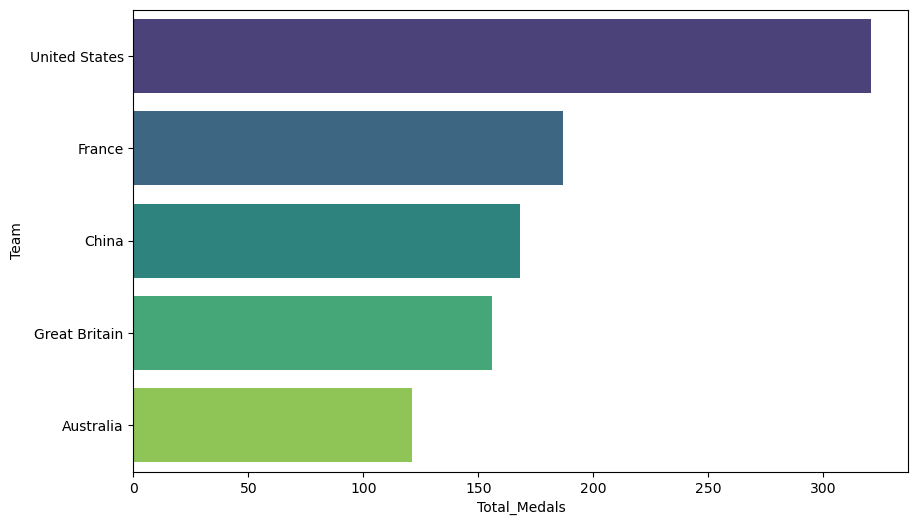

In [13]:
# for year 2024 the ranking would be
plt.figure(figsize=(10, 6))
sns.barplot(x='Total_Medals', y='Team', data=medal_count[medal_count['Year'] == 2024].head(), palette='viridis')


#### Sports contributing the most medals

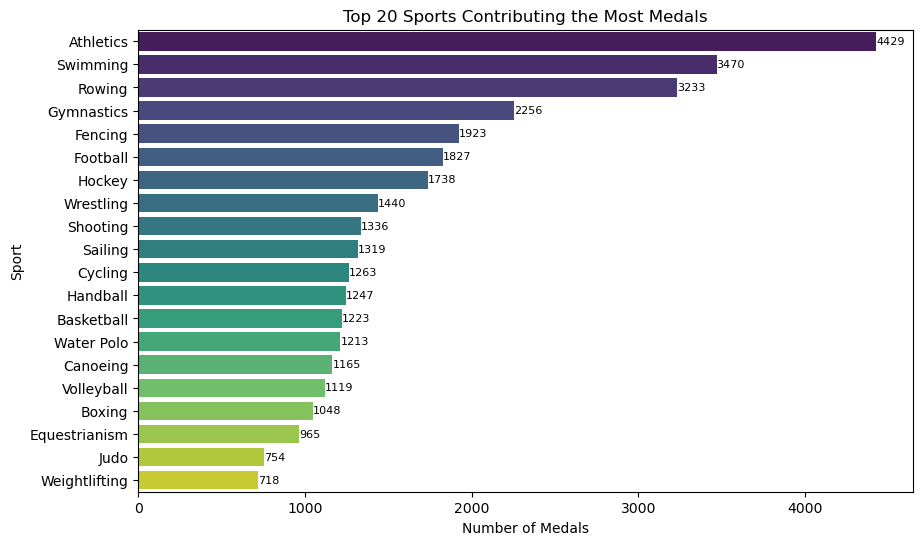

In [14]:
bar_data = medal_df['Sport'].value_counts().head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x=bar_data.values, y=bar_data.index, palette='viridis')

# Add numbers on the bars
for i, (value, sport) in enumerate(zip(bar_data.values, bar_data.index)):
    plt.text(value, i, f'{value}', va='center', ha='left', color='black', fontsize=8)

plt.title('Top 20 Sports Contributing the Most Medals')
plt.xlabel('Number of Medals')
plt.ylabel('Sport')
plt.show()

In [15]:
# Identify athletes with the most medals over the years
medal_df['Name'].value_counts()

Name
Michael Ii           28
Larysa (diriy-)      18
Charles Jr.          16
Nikolay Andrianov    15
Gustaf Carlberg      13
                     ..
Kim Seong-mun         1
Kim Seon-yeong        1
Kim Sang-gyu          1
Kim Rang              1
Charlie Carvell       1
Name: count, Length: 27723, dtype: int64

#### Which athletes have consistently performed over multiple Olympic Games after 2008

In [16]:
# 
athlete_consistency = medal_df[medal_df['Year'] >= 2008].groupby('Name')['Year'].nunique().reset_index()

# Filter for athletes who have participated in more than one Olympic year
consistent_athletes = athlete_consistency[athlete_consistency['Year'] > 1]
consistent_athletes.sort_values(by='Year', ascending=False).head(20)

,Name,Year
1708,Diana Taurasi,5
7024,Teddy Riner,5
3201,Jessica Fox,4
3750,Kevin Durant,4
6885,Svetlana Romashina,4
2242,Florent Manaudou,4
351,Allyson Felix,4
1096,Camilla Herrem,4
347,Allison Schmitt,4
1116,Carl Hester,4


#### Rising athlete based on their past performance in recent Olympics (e.g., 2020 and 2024) 

##### PS: for next Olympics

In [17]:
# Filter for the 2020 and 2024 Olympic Games
recent_olympics = medal_df[medal_df['Year'] >= 2020]

# Group by athlete and count the medals won in 2020 and 2024
recent_performance = recent_olympics.groupby('Name')['Medal'].count().reset_index()
recent_performance.rename(columns={'Medal': 'Recent_Medal_Count'}, inplace=True)

previous_olympics = medal_df[medal_df['Year'].isin([2012, 2016])]

# Group by athlete and count the medals won before 2020
previous_performance = previous_olympics.groupby('Name')['Medal'].count().reset_index()
previous_performance = previous_performance.rename(columns={'Medal': 'Previous_Medal_Count'})

# Merge the two DataFrames to compare recent performance with past performance
rising_stars = pd.merge(recent_performance, previous_performance, on='Name', how='left')
rising_stars['Previous_Medal_Count'] = rising_stars['Previous_Medal_Count'].fillna(0)  # Fill NaNs with 0

# Identify rising athletes (who have more medals in recent years than before 2020)
rising_stars = rising_stars[rising_stars['Previous_Medal_Count'] == 0]

# Display rising stars
rising_stars.sort_values(by=['Recent_Medal_Count','Previous_Medal_Count'], ascending=False).head(15)

,Name,Recent_Medal_Count,Previous_Medal_Count
2315,McKEON Emma,10,0.0
3609,Yufei Zhang,10,0.0
2316,McKEOWN Kaylee,9,0.0
352,Ariarne Titmus,8,0.0
2436,Mollie O'callaghan,8,0.0
2803,Regan Smith,8,0.0
1210,Harrie Lavreysen,6,0.0
1653,Junxuan Yang,6,0.0
2793,Rebeca Andrade,6,0.0
3076,Sifan Hassan,6,0.0


In [18]:
top10_athletes=recent_olympics['Name'].value_counts().head(10)
top10_athletes

Name
McKEON Emma           10
Yufei Zhang           10
McKEOWN Kaylee         9
Mollie O'callaghan     8
Regan Smith            8
Caeleb Dressel         8
Ariarne Titmus         8
Lisa Carrington        6
Sifan Hassan           6
Harrie Lavreysen       6
Name: count, dtype: int64

#### Gender wise participation

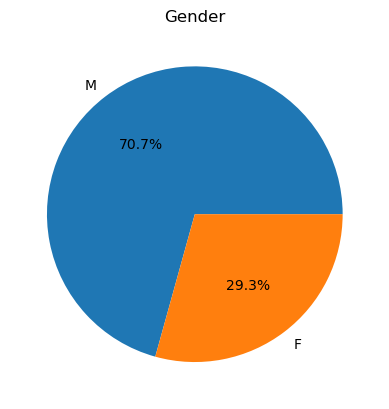

In [19]:
sex=df['Sex'].value_counts()
sex.plot.pie(autopct='%1.1f%%')
plt.title('Gender')
plt.ylabel('')
plt.show()

In [20]:
# female led sports
df[df['Sex'] == 'F']['Sport'].value_counts()

Sport
Athletics                              13948
Swimming                               11366
Gymnastics                              9129
Rowing                                  2706
Fencing                                 2406
                                       ...  
Cycling Road, Cycling Mountain Bike        2
Cycling Road, Triathlon                    2
Alpinism                                   1
Motorboating                               1
3x3 Basketball, Basketball                 1
Name: count, Length: 64, dtype: int64

#### Most medals recorded by City

In [21]:
medal_counts_per_city = df.groupby(['City', 'Medal']).size().unstack(fill_value=0)
# using unstack transformed the Medal category (from being part of the MultiIndex) into separate columns

top20=medal_counts_per_city.head(20)
top20

Medal,Bronze,Gold,No medal,Silver
City,,,,
Amsterdam,250,245,4258,239
Antwerpen,367,493,2984,448
Athina,860,883,12954,859
Atlanta,629,608,11938,605
Barcelona,604,559,11265,549
Beijing,710,671,11554,667
Berlin,295,312,5589,310
Helsinki,300,306,7373,291
London,1214,1215,18802,1195


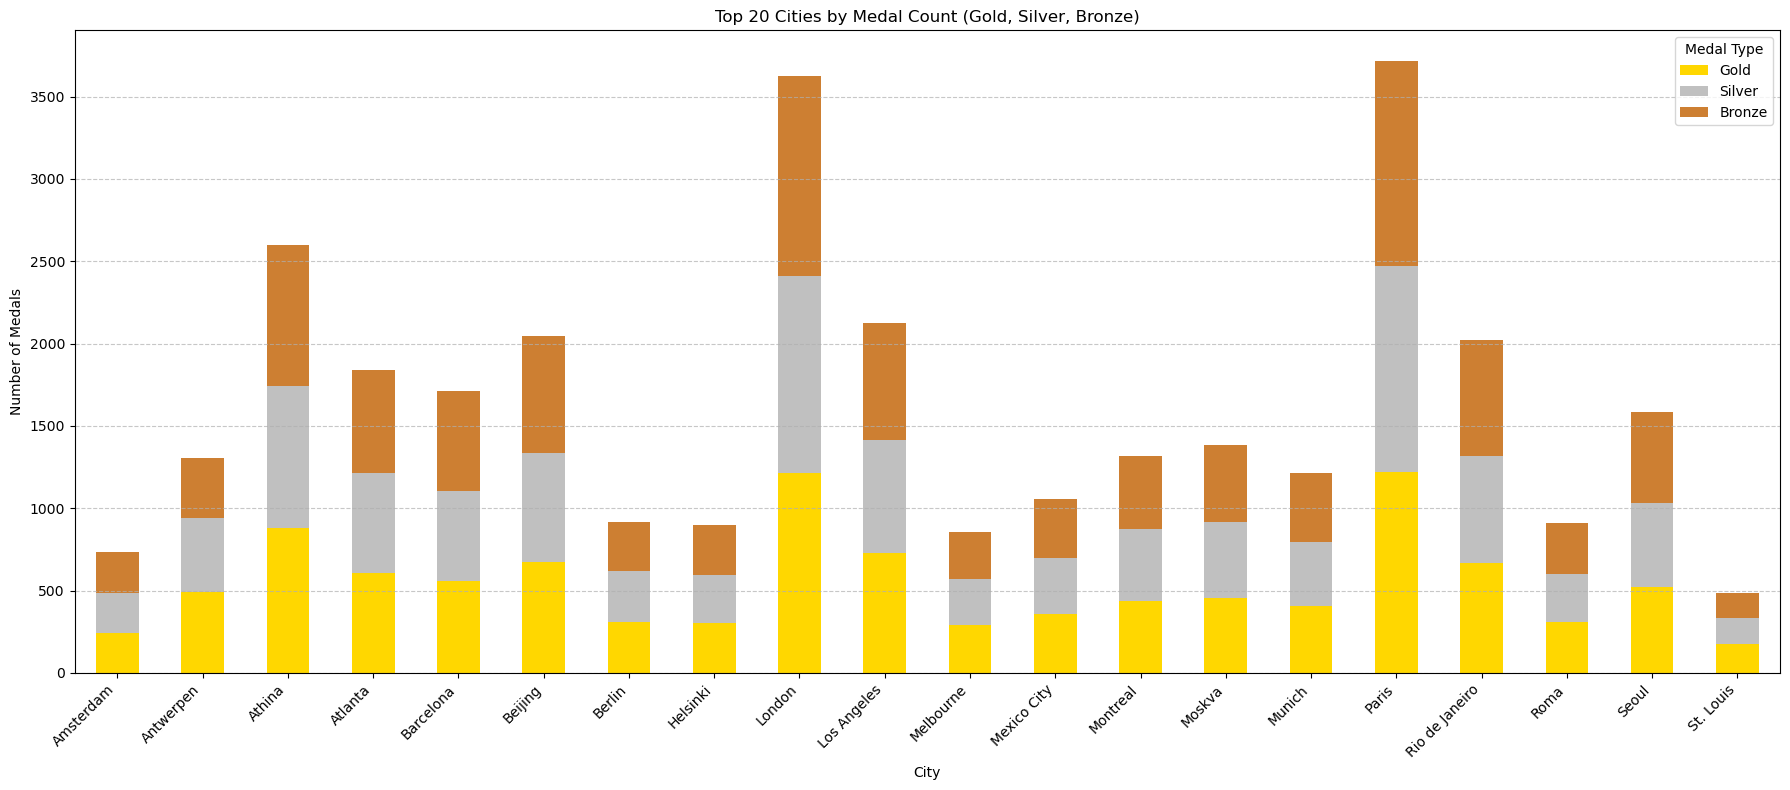

In [24]:
top20 = medal_counts_per_city.head(20).reset_index()

fig, ax = plt.subplots(figsize=(18, 8))

colors = {'Gold': 'gold', 'Silver': 'silver', 'Bronze': '#cd7f32'}

top20[['Gold', 'Silver', 'Bronze']].plot(kind='bar', stacked=True, ax=ax, color=[colors['Gold'], colors['Silver'], colors['Bronze']])

ax.set_title('Top 20 Cities by Medal Count (Gold, Silver, Bronze)')
ax.set_xlabel('City')
ax.set_ylabel('Number of Medals')
ax.legend(title='Medal Type')
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_xticks(range(len(top20)))
ax.set_xticklabels(top20['City'], rotation=45, ha='right')

plt.tight_layout()
plt.show()